### ロジット関数

オッズ比の対数（対数オッズ）

$$ logit(p) = log\frac{p}{(1-p)} $$

この関数を使って、特徴量の値と対数オッズの間の線形関係を表すことができる

$$ logit(p(y=1|x) = w_0x_0 +  w_1x_1 + ... +  w_mx_m = \sum_{i=0}^mw_ix_i = w^Tx  $$

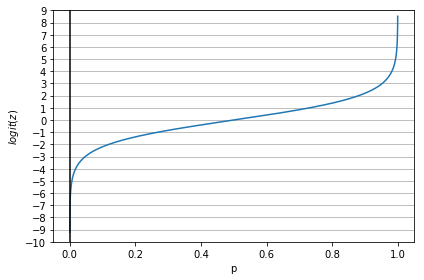

In [17]:
import matplotlib.pyplot as plt
import numpy as np


def logit(p):
    ones = np.ones(p.size)
    return np.log(p / (ones - p))

z = np.arange(0.0001, 0.9999, 0.0001)
phi_z = logit(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-7, 7)
plt.xlabel('p')
plt.ylabel('$logit(z)$')

# y axis ticks and gridline
plt.yticks(range(-10, 10, 1))
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
# plt.savefig('./figures/sigmoid.png', dpi=300)
plt.show()

### シグモイド関数

ロジット関数の逆関数。

$$ \phi(z) = \frac{1}{1+e^(-z)} $$

ステップ関数とは異なり緩やかに上昇していくため、例えば結果が降水確率が0.8なら80%であるということができる。

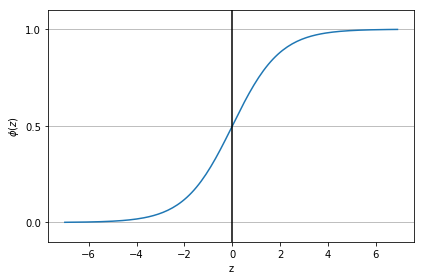

In [16]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
# plt.savefig('./figures/sigmoid.png', dpi=300)
plt.show()

### ロジスティック回帰の重みの学習

尤度L：結果から見たところの条件のもっともらしさ

$$ L(w) = P(y|x;w) = \prod_{i=1}^nP(y^{(i)}|x^{(i)};w) = \prod_{i=1}^n(\phi(z^{(i)}))^{(y^{(i)})}(1-\phi(z^{(i)}))^{1-y^{(i)}} $$

\\( P(y|x;w) \\)の;wはwをパラメータに持つという意味。

対数尤度l：
* アンダーフローの可能性低下
* 積が和に変換されるため加算を用いて微分できるようになる

$$ l(w) = logL(w) = \sum_{i=1}^n\bigl[(y^{(i)}log(\phi(z^{(i)})))+({1-y^{(i)})log(1-\phi(z^{(i)}))}\bigr] $$

上記関数は勾配上昇するので、コスト関数Jとしてはマイナスにする

$$ J(w) = \sum_{i=1}^n\bigl[(-y^{(i)}log(\phi(z^{(i)})))-({1-y^{(i)})log(1-\phi(z^{(i)}))}\bigr] $$

1つのサンプルで計算されるコストは、上式から\\( \sum \\)と\\( (i) \\)を取って、

$$ J(\phi(z),y;w) = -ylog(\phi(z))-(1-y)log(1-\phi(z)) $$

上式から、y=0であれば1つ目の項が0になりy=1であれば2つ目の項が0になる。

$$ J(\phi(z),y;w) = \begin{cases}
-log(\phi(z)) & \text (y=1)\\
-log(1-\phi(z))   & \text (y=0)\end{cases}$$


In [22]:
from sklearn import datasets
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Irisデータセットをロード
iris = datasets.load_iris()
# 3,4列目の特徴量を抽出
X = iris.data[:, [2, 3]]
# クラスラベルを取得
y = iris.target
# print('Class labels:', np.unique(y))

# テストデータの分離
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 特徴量のスケーリング
sc = StandardScaler()
# トレーニングデータの平均と標準偏差を計算
sc.fit(X_train)
# 平均と標準偏差を用いて標準化
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.6,
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx],
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

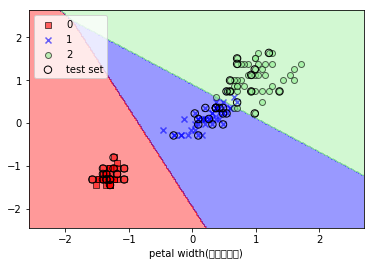

[[  2.05743774e-11   6.31620264e-02   9.36837974e-01]]


/Users/maeda/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [25]:
# Pythonでの実装
from sklearn.linear_model import LogisticRegression
# ロジスティック回帰のインスタンスを生成
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)
# 決定境界をプロット
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
# ラベル設定
plt.xlabel('petal width(標準化済み)')
# 凡例を設定
plt.legend(loc='upper left')
plt.show()

print(lr.predict_proba(X_test_std[0,:]))